In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator


In [4]:
# --- Step 2: Load Selected Features Dataset ---
data = pd.read_csv(r"C:\Users\USER\python\heart_final_selected.csv")
print("Dataset loaded successfully. Shape:", data.shape)
data.head()


Dataset loaded successfully. Shape: (303, 10)


,ca,exang,cp,restecg,thalach,oldpeak,thal,sex,slope,target
0,0.0,0.0,1.0,2.0,150.0,2.3,6.0,1.0,3.0,0
1,3.0,1.0,4.0,2.0,108.0,1.5,3.0,1.0,2.0,1
2,2.0,1.0,4.0,2.0,129.0,2.6,7.0,1.0,2.0,1
3,0.0,0.0,3.0,0.0,187.0,3.5,3.0,1.0,3.0,0
4,0.0,0.0,2.0,2.0,172.0,1.4,3.0,0.0,1.0,0


In [5]:
# --- Step 3: Separate Features and Target 

features = data.drop("target", axis=1)
labels = data["target"]

print(" Features shape:", features.shape)
print("Labels distribution:\n", labels.value_counts())


 Features shape: (303, 9)
Labels distribution:
 target
0    164
1    139
Name: count, dtype: int64


Optimal number of clusters (K) = 3


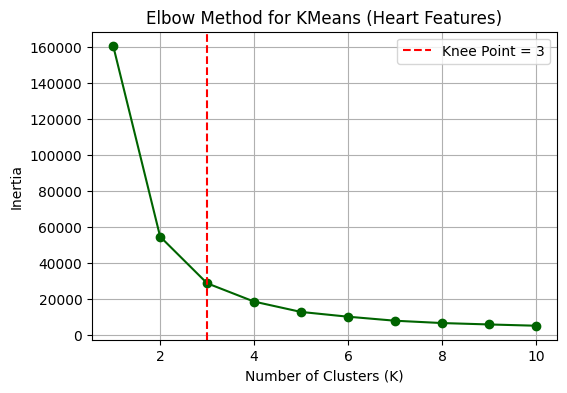

In [6]:
# --- Step 4: K-Means - Elbow Method ---
distortions = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(features)
    distortions.append(km.inertia_)

# Auto Knee Detection
kneedle = KneeLocator(k_values, distortions, curve="convex", direction="decreasing")
best_k = kneedle.knee
print(f"Optimal number of clusters (K) = {best_k}")

# Plot Elbow
plt.figure(figsize=(6,4))
plt.plot(k_values, distortions, marker="o", color="darkgreen")
plt.axvline(best_k, color="red", linestyle="--", label=f"Knee Point = {best_k}")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans (Heart Features)")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# --- Step 5: Train K-Means and Evaluate ---
km_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters_km = km_final.fit_predict(features)

sil_km = silhouette_score(features, clusters_km)
ari_km = adjusted_rand_score(labels, clusters_km)

print(f"KMeans - Silhouette Score: {sil_km:.4f}, ARI: {ari_km:.4f}")


KMeans - Silhouette Score: 0.4944, ARI: 0.0929


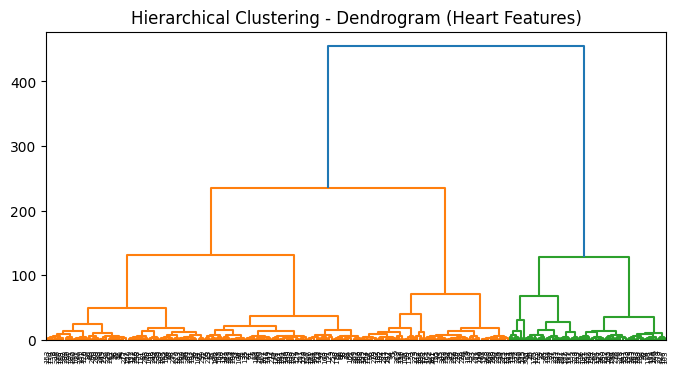

Hierarchical - Silhouette Score: 0.5011, ARI: 0.0752


In [8]:
# --- Step 6: Hierarchical Clustering ---
Z = linkage(features, method="ward")

plt.figure(figsize=(8,4))
dendrogram(Z, orientation="top", distance_sort="descending", show_leaf_counts=False, color_threshold=None)
plt.title("Hierarchical Clustering - Dendrogram (Heart Features)")
plt.show()

hier = AgglomerativeClustering(n_clusters=best_k, linkage="ward")
clusters_hier = hier.fit_predict(features)

sil_hier = silhouette_score(features, clusters_hier)
ari_hier = adjusted_rand_score(labels, clusters_hier)

print(f"Hierarchical - Silhouette Score: {sil_hier:.4f}, ARI: {ari_hier:.4f}")


In [9]:
# --- Step 7: Comparison with True Labels ---
compare_df = pd.DataFrame({
    "True_Label": labels,
    "KMeans_Cluster": clusters_km,
    "Hierarchical_Cluster": clusters_hier
})
compare_df.head()


,True_Label,KMeans_Cluster,Hierarchical_Cluster
0,0,1,0
1,1,2,1
2,1,2,1
3,0,0,2
4,0,0,2


In [ ]:
# --- Step 8: Save Results ---
os.makedirs("results", exist_ok=True)

km_out = data.copy()
km_out["KMeans_Cluster"] = clusters_km
km_out.to_csv(r"C:\Users\USER\python\k_Means_clusters.csv", index=False)

hier_out = data.copy()
hier_out["Hierarchical_Cluster"] = clusters_hier

